# histograma de niveles de gris

In [1]:
%matplotlib inline

import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt

from skimage.io import imread

def fig(w,h):
    return plt.figure(figsize=(w,h))

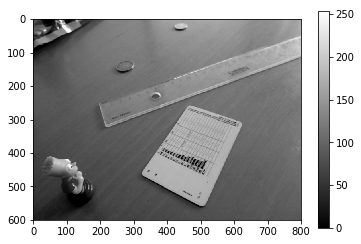

In [2]:
img = imread('../images/coins.png')
g = cv.cvtColor(img,cv.COLOR_RGB2GRAY)

plt.imshow(g,'gray');
plt.colorbar();

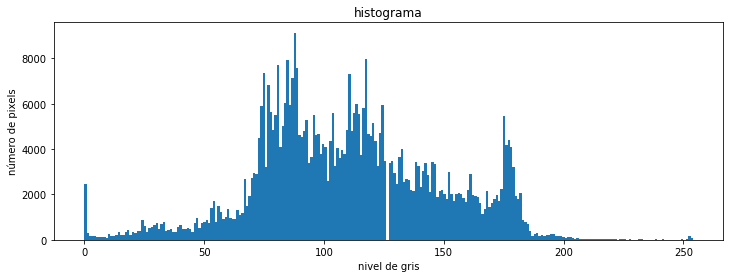

In [3]:
fig(12,4)
plt.hist(g.flatten(), 256); plt.xlabel('nivel de gris'); plt.ylabel('número de pixels');
plt.title('histograma');

## transformaciones de "valor"

Se modifica cada pixel independientemente de los demás.

In [4]:
img = imread('http://robot.inf.um.es/material/va/images/exposure/exposure1.jpg')
#img = imread('images/coins.png')
#img = imread('images/cube3.png')

In [5]:
g = cv.cvtColor(img,cv.COLOR_RGB2GRAY).astype(float)

In [6]:
def show(x):
    fig(12,4)
    plt.subplot(1,2,1)
    plt.imshow(x,'gray',vmin=0, vmax=255)
    plt.subplot(1,2,2)
    kk = plt.hist(np.clip(x,0,255).flatten(),256); plt.axis([-1,256,0,10000]);
    #print(kk[0])

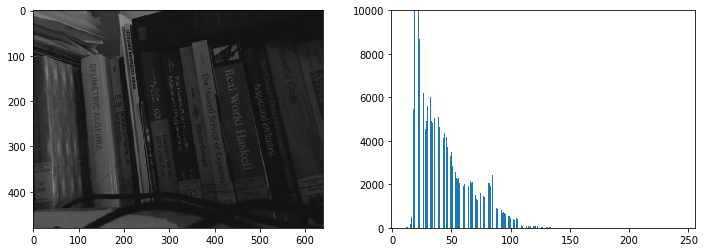

In [7]:
show(g)

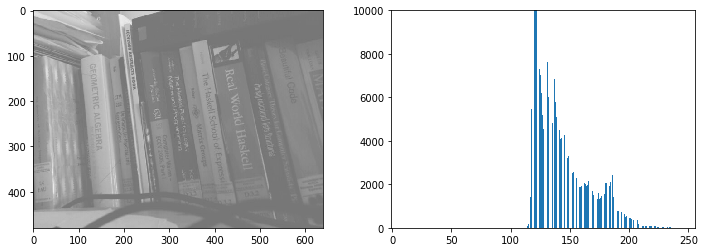

In [8]:
show(g+100)

## histogram equalization

En el siguiente ejemplo vamos a mostrar un par de técnicas de normalización de contraste que tratan de repartir un poco mejor la gama de blanco a negro de la imagen.

In [9]:
# trabajan con pixels enteros
g = cv.cvtColor(img,cv.COLOR_RGB2GRAY)

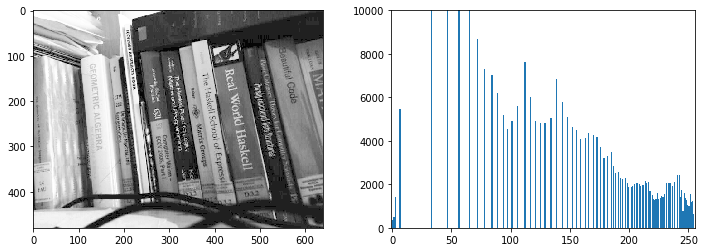

In [10]:
show(cv.equalizeHist(g))

In [11]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

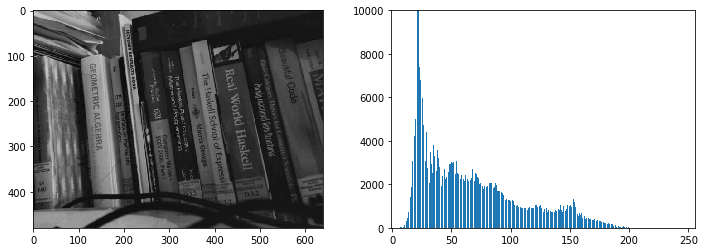

In [12]:
show(clahe.apply(g))